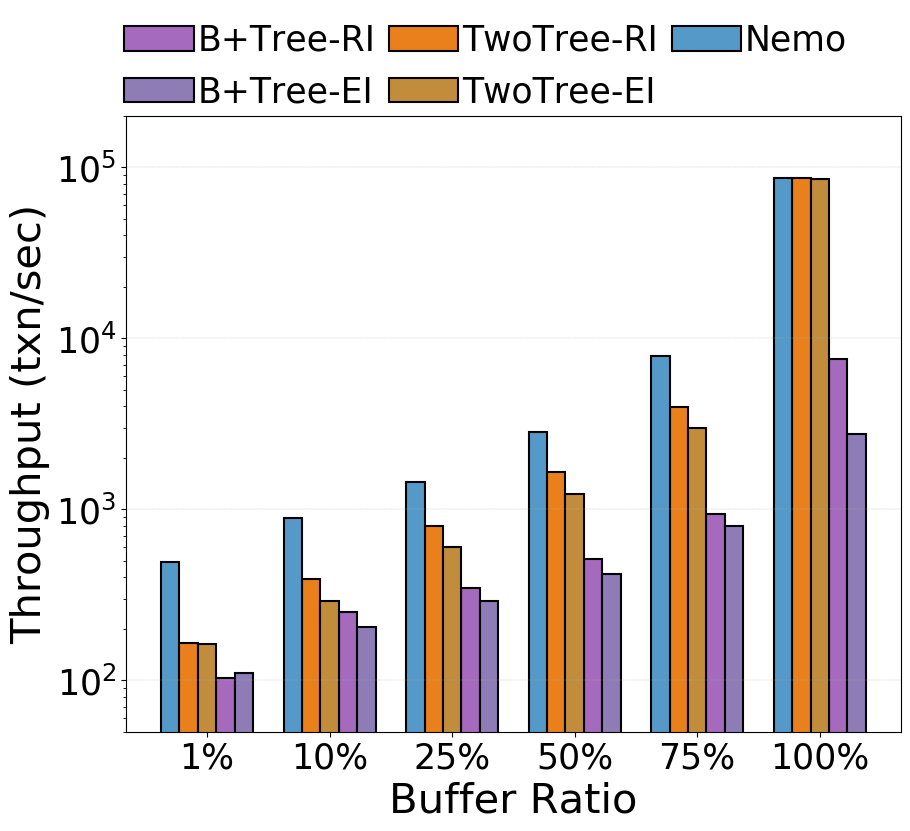

In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from process_helper import select_color_idx
import matplotlib.colors as mcolors


txtsize=30
ticksize=25

color_indices, line_colors = select_color_idx(4)
# bonsai_c = "#ea801c"
# page_retain_c = "#31a354"
# # page_retain_c = line_colors["BLUE"]
# page_evict_c = "#78c679"
# tt_retain_c = "#1f6f6f"
# tt_evict_c = "#54a1a1"

lw = 1.5
bonsai_c = line_colors["BLUE"]
page_retain_c = line_colors["PURPLE"]
page_evict_c = "#78c679"
tt_retain_c =  "#ea801c"
tt_evict_c = "#54a1a1"


def shift(color, mix, alpha):
    a = mcolors.to_rgb(color)
    b = mcolors.to_rgb(mix)
    return mcolors.to_hex([(1 - alpha) * x + alpha * y for x, y in zip(a, b)])

page_evict_c = shift(page_retain_c, line_colors["GREEN"], 0.25)  # pull purple toward azure
tt_evict_c   = shift(tt_retain_c, line_colors["GREEN"], 0.25)   # pull orange toward warm yellow

bonsai_label = "Nemo"
page_idx_label = "B+Tree-RI"
page_idx_evict_label = "B+Tree-EI" 
tt_idx_label = "TwoTree-RI"
tt_idx_evict_label = "TwoTree-EI"


datadir = "../../output/"
exp_page = "exp_point_10g_page_varybuf"
exp_page_idx_evict = "exp_point_10g_page_varybuf_idx_evict"
exp_tuple = "exp_point_10g_tuple_varybuf"
exp_twotree = "exp_point_10g_twotree_varybuf"
exp_twotree_idx_evict = "exp_point_10g_twotree_varybuf_idx_evict"

# Load and prepare the data
data_page = [json.loads(line) for line in open(datadir + exp_page + ".txt")]
df_page = pd.DataFrame().from_records(data_page).sort_values(by='g_total_buf_sz')[:-1]

data_page_idx_evict = [json.loads(line) for line in open(datadir + exp_page_idx_evict + ".txt")]
df_page_idx_evict = pd.DataFrame().from_records(data_page_idx_evict).sort_values(by='g_total_buf_sz')[:-1]

data_tuple = [json.loads(line) for line in open(datadir + exp_tuple + ".txt")]
df_tuple = pd.DataFrame().from_records(data_tuple).sort_values(by='g_total_buf_sz')[:-1]

data_tt = [json.loads(line) for line in open(datadir + exp_twotree + ".txt")]
df_tt = pd.DataFrame().from_records(data_tt).sort_values(by='g_total_buf_sz')[:-1]

data_tt_idx_evict = [json.loads(line) for line in open(datadir + exp_twotree_idx_evict + ".txt")]
df_tt_idx_evict = pd.DataFrame().from_records(data_tt_idx_evict)
df_tt_idx_evict = df_tt_idx_evict.sort_values(by='g_total_buf_sz')[:-1]


fig, ax1 = plt.subplots(figsize=(10, 8))

bar_width = 0.15
indices = np.arange(len(df_page))
offset = bar_width

# Bar chart for the primary data
ax1.bar((indices + offset), df_page["throughput_txn_per_sec"], bar_width, edgecolor='black', linewidth=lw, label=page_idx_label, color=page_retain_c)
ax1.bar(indices + offset * 2, df_page_idx_evict["throughput_txn_per_sec"], bar_width,  edgecolor='black', linewidth=lw, label=page_idx_evict_label, color=page_evict_c)
ax1.bar(indices - offset, df_tt["throughput_txn_per_sec"], bar_width, edgecolor='black', linewidth=lw, label=tt_idx_label, color=tt_retain_c)
ax1.bar(indices , df_tt_idx_evict["throughput_txn_per_sec"], bar_width,  edgecolor='black', linewidth=lw,label=tt_idx_evict_label, color=tt_evict_c)
ax1.bar(indices - offset * 2, df_tuple["throughput_txn_per_sec"], bar_width,  edgecolor='black', linewidth=lw,label=bonsai_label, color=bonsai_c)

ax1.set_xticks(indices)
x_tick_num = np.round(df_page["g_total_buf_sz"] * 100 / (12 * 1000 * 1000 * 1000), 2).astype(int)
x_tick_labels = [f"{num}%" for num in x_tick_num]

ax1.set_xticklabels(x_tick_labels, fontsize=ticksize)
ax1.tick_params(axis='y', labelsize=ticksize)

ax1.set_yscale('log')
ax1.set_ylim(50, 200000)

ax1.set_ylabel("Throughput (txn/sec)", fontsize=txtsize)
ax1.set_xlabel("Buffer Ratio", fontsize=txtsize)
ax1.grid(axis='y', linestyle='--', linewidth=0.25)

legend = ax1.legend(fontsize=ticksize, bbox_to_anchor=(-0.02, 1.07, 1.1, .102), loc=2,
           ncol=3,borderaxespad=0., frameon=False,columnspacing=0.4, handletextpad=0.1)

plt.savefig("/home/hippo/Nemo/figures/ev1-ro-tps-bars-speedup.pdf",bbox_inches='tight')


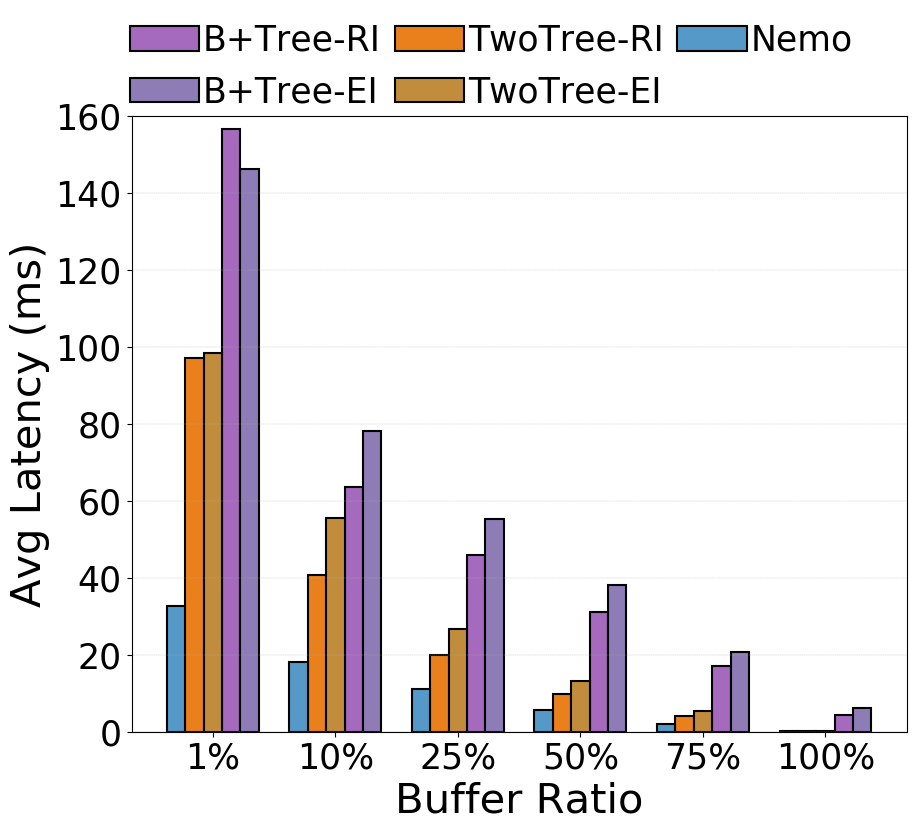

In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from process_helper import select_color_idx
import matplotlib.colors as mcolors
color_indices, line_colors = select_color_idx(4)

bonsai_c = line_colors["BLUE"]
page_retain_c = line_colors["PURPLE"]
page_evict_c = "#78c679"
tt_retain_c =  "#ea801c"
tt_evict_c = "#54a1a1"


def shift(color, mix, alpha):
    a = mcolors.to_rgb(color)
    b = mcolors.to_rgb(mix)
    return mcolors.to_hex([(1 - alpha) * x + alpha * y for x, y in zip(a, b)])

page_evict_c = shift(page_retain_c, line_colors["GREEN"], 0.25)  # pull purple toward azure
tt_evict_c   = shift(tt_retain_c, line_colors["GREEN"], 0.25)   # pull orange toward warm yellow


datadir = "../../output/"
exp_page = "exp_point_10g_page_varybuf"
exp_page_idx_evict = "exp_point_10g_page_varybuf_idx_evict"
exp_tuple = "exp_point_10g_tuple_varybuf"
exp_twotree = "exp_point_10g_twotree_varybuf"
exp_twotree_idx_evict = "exp_point_10g_twotree_varybuf_idx_evict"

# Load and prepare the data
data_page = [json.loads(line) for line in open(datadir + exp_page + ".txt")]
df_page = pd.DataFrame().from_records(data_page).sort_values(by='g_total_buf_sz')[:-1]

data_page_idx_evict = [json.loads(line) for line in open(datadir + exp_page_idx_evict + ".txt")]
df_page_idx_evict = pd.DataFrame().from_records(data_page_idx_evict).sort_values(by='g_total_buf_sz')[:-1]

data_tuple = [json.loads(line) for line in open(datadir + exp_tuple + ".txt")]
df_tuple = pd.DataFrame().from_records(data_tuple).sort_values(by='g_total_buf_sz')[:-1]

data_tt = [json.loads(line) for line in open(datadir + exp_twotree + ".txt")]
df_tt = pd.DataFrame().from_records(data_tt).sort_values(by='g_total_buf_sz')[:-1]

data_tt_idx_evict = [json.loads(line) for line in open(datadir + exp_twotree_idx_evict + ".txt")]
df_tt_idx_evict = pd.DataFrame().from_records(data_tt_idx_evict)
df_tt_idx_evict = df_tt_idx_evict.sort_values(by='g_total_buf_sz')[:-1]

dimension = "avg_sum_txn_latency (us)"

fig, ax1 = plt.subplots(figsize=(10, 8))

bar_width = 0.15
indices = np.arange(len(df_page))
offset = bar_width

# Bar chart for the primary data
ax1.bar(indices + offset, df_page[dimension]/1000.0, bar_width, label=page_idx_label, edgecolor='black', linewidth=lw,color=page_retain_c)
ax1.bar(indices + offset * 2, df_page_idx_evict[dimension]/1000.0, bar_width, label=page_idx_evict_label, edgecolor='black', linewidth=lw, color=page_evict_c)
ax1.bar(indices - offset, df_tt[dimension]/1000.0, bar_width, label=tt_idx_label, edgecolor='black', linewidth=lw,color=tt_retain_c)
ax1.bar(indices , df_tt_idx_evict[dimension]/1000.0, bar_width, label=tt_idx_evict_label, edgecolor='black', linewidth=lw,color=tt_evict_c)
ax1.bar(indices - offset * 2, df_tuple[dimension]/1000.0, bar_width, label=bonsai_label, edgecolor='black', linewidth=lw,color=bonsai_c)


ax1.set_xticks(indices)
x_tick_num = np.round(df_page["g_total_buf_sz"] * 100 / (12 * 1000 * 1000 * 1000), 2).astype(int)
x_tick_labels = [f"{num}%" for num in x_tick_num]

ax1.set_xticklabels(x_tick_labels, fontsize=ticksize)

ax1.tick_params(axis='y', labelsize=ticksize)
ax1.set_ylim(0, 160)
ax1.set_ylabel("Avg Latency (ms)", fontsize=txtsize)
ax1.set_xlabel("Buffer Ratio", fontsize=txtsize)
ax1.grid(axis='y', linestyle='--', linewidth=0.25)
legend = ax1.legend(fontsize=ticksize, bbox_to_anchor=(-0.02, 1.07, 1.1, .102), loc=2,
           ncol=3,borderaxespad=0., frameon=False,columnspacing=0.4, handletextpad=0.1)

plt.savefig("/home/hippo/Nemo/figures/ev1-ro-avg-latency-bars-speedup.pdf",bbox_inches='tight')

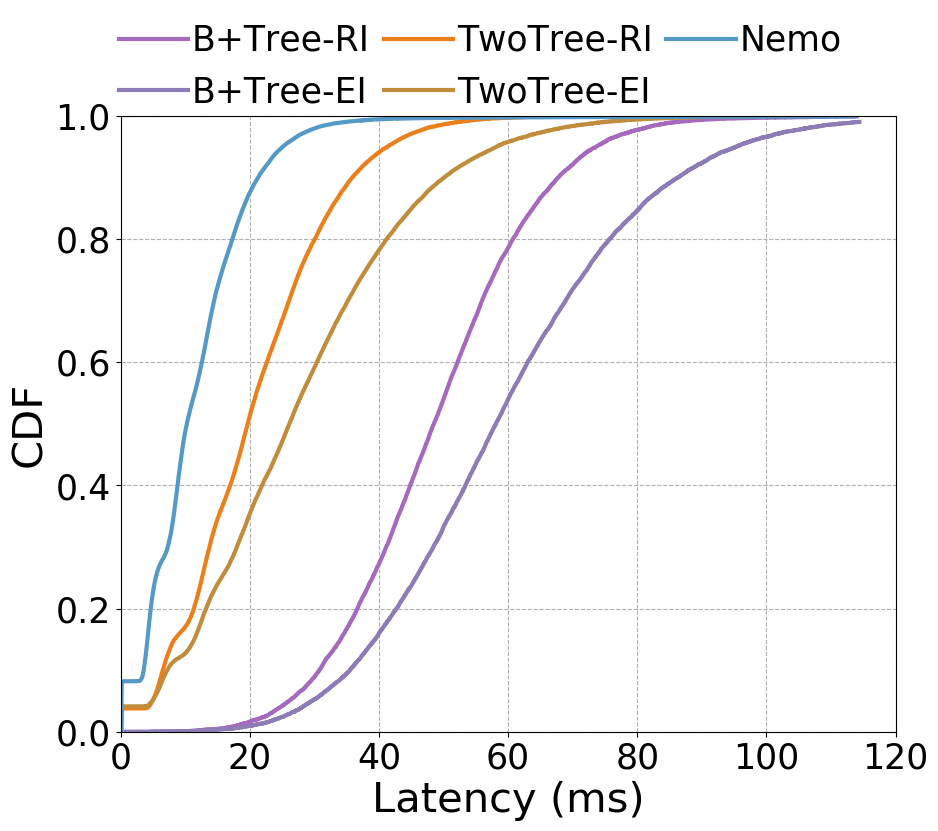

In [ ]:

import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from process_helper import *

datadir = "../../output/"
test = "exp_point_cdf"

# Load and prepare the data
cdf_data = [json.loads(line) for line in open(datadir + test + ".txt")]
df_data = pd.DataFrame().from_records(cdf_data)
df_data = apply_mask(df_data, [
    ["read_perc_", ["eq", 1]]
]) 
cdf_tuple = apply_mask(df_data, [
    ["g_buf_type", ["eq", "OBJBUF"]]
])
cdf_page = apply_mask(df_data, [
    ["g_buf_type", ["eq", "PGBUF"]]
]) 
cdf_page_idx = apply_mask(cdf_page, [
    ["g_retain_idx_page", ["eq", "True"]]
]) 
cdf_page_idx_evict = apply_mask(cdf_page, [
    ["g_retain_idx_page", ["eq", "False"]]
]) 

cdf_tt = apply_mask(df_data, [
    ["g_buf_type", ["eq", "HYBRBUF"]]
]) 
cdf_tt_idx = apply_mask(cdf_tt, [
    ["g_retain_idx_page", ["eq", "True"]]
]) 
cdf_tt_idx_evict = apply_mask(cdf_tt, [
    ["g_retain_idx_page", ["eq", "False"]]
]) 


# Assuming 'txn_latency_dist_ms' contains latency values
latency_data_tuple = np.array(cdf_tuple["txn_latency_dist_ms"].iloc[0]) 
latency_data_page = np.array(cdf_page_idx["txn_latency_dist_ms"].iloc[0])  
latency_data_page_evict = np.array(cdf_page_idx_evict["txn_latency_dist_ms"].iloc[0])  
latency_data_tt = np.array(cdf_tt_idx["txn_latency_dist_ms"].iloc[0])  
latency_data_tt_evict = np.array(cdf_tt_idx_evict["txn_latency_dist_ms"].iloc[0]) 


cutoff_percentile = 99
cutoff_value_tuple = np.percentile(latency_data_tuple, cutoff_percentile)
cutoff_value_page = np.percentile(latency_data_page, cutoff_percentile)
cutoff_value_page_evict = np.percentile(latency_data_page_evict, cutoff_percentile)
cutoff_value_tt = np.percentile(latency_data_tt, cutoff_percentile)
cutoff_value_tt_evict = np.percentile(latency_data_tt_evict, cutoff_percentile)
# print(cutoff_value_tuple)
cutoff_value = max([cutoff_value_tuple, cutoff_value_page, cutoff_value_page_evict,cutoff_value_tt, cutoff_value_tt_evict])
# Filter the data to exclude values beyond the cutoff
# Sort the data for the CDF
sorted_latency_tuple = np.sort(latency_data_tuple[latency_data_tuple <= cutoff_value])
sorted_latency_page = np.sort(latency_data_page[latency_data_page <= cutoff_value])
sorted_latency_page_evict = np.sort(latency_data_page_evict[latency_data_page_evict <= cutoff_value])
sorted_latency_tt = np.sort(latency_data_tt[latency_data_tt <= cutoff_value])
sorted_latency_tt_evict = np.sort(latency_data_tt_evict[latency_data_tt_evict <= cutoff_value])

# Plot the CDF
plt.figure(figsize=(10, 8))
line_width= 3
plt.step(sorted_latency_page, np.arange(1, len(sorted_latency_page) + 1) / len(latency_data_page), where='mid', linestyle='-', linewidth=line_width, color=page_retain_c, label=page_idx_label)
plt.step(sorted_latency_page_evict, np.arange(1, len(sorted_latency_page_evict) + 1) / len(latency_data_page_evict), where='mid', linestyle='-', linewidth=line_width, color=page_evict_c, label=page_idx_evict_label)
plt.step(sorted_latency_tt, np.arange(1, len(sorted_latency_tt) + 1) / len(latency_data_tt), where='mid', linestyle='-', linewidth=line_width, color=tt_retain_c, label=tt_idx_label)
plt.step(sorted_latency_tt_evict, np.arange(1, len(sorted_latency_tt_evict) + 1) / len(latency_data_tt_evict), where='mid', linestyle='-', linewidth=line_width, color=tt_evict_c, label=tt_idx_evict_label)
plt.step(sorted_latency_tuple, np.arange(1, len(sorted_latency_tuple) + 1) / len(latency_data_tuple), where='mid', linestyle='-', linewidth=line_width, color=bonsai_c, label=bonsai_label)

legend = plt.legend(fontsize=ticksize, bbox_to_anchor=(-0.02, 1.07, 1.1, .102), loc=2,
           ncol=3,borderaxespad=0., frameon=False,columnspacing=0.4, handletextpad=0.1)
plt.xlabel('Latency (ms)', fontsize=txtsize)
plt.ylabel('CDF', fontsize= txtsize)
plt.xlim(0, 120) 
plt.ylim(0, 1.0)  
plt.grid(True, linestyle = '--')
plt.tick_params(axis='both', labelsize=ticksize)

plt.savefig("/home/hippo/Nemo/figures/ev1-ro-latency-cdf.pdf",bbox_inches='tight')
plt.show()

0    7.743942
1    6.167701
2    2.949913
3    1.415848
5    0.569623
6    0.000000
dtype: float64


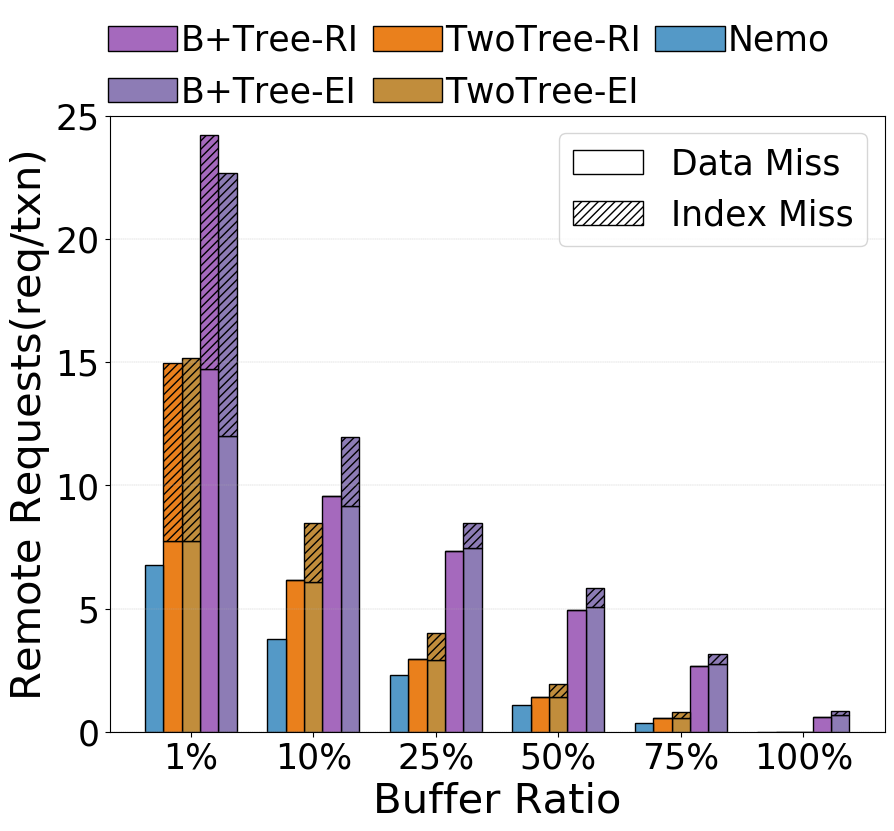

In [ ]:

from matplotlib.patches import Patch
fig = plt.figure(figsize=(10, 8))


index = np.arange(len(df_tuple["g_total_buf_sz"]))

bar_width = 0.15

ax1 = fig.add_subplot(1, 1, 1)

indices = np.arange(len(df_page))

bottom_bar =  (df_page_idx_evict["misses_"] -  df_page_idx_evict["idx_misses_"])/df_page_idx_evict["txn_cnt_"]
ax1.bar(indices + offset * 2, 
        bottom_bar, width = bar_width,edgecolor='black',
        color=page_evict_c,
        label=page_idx_evict_label)
ax1.bar(indices + offset * 2, 
        df_page_idx_evict["idx_misses_"]/df_page_idx_evict["txn_cnt_"], bottom=bottom_bar, hatch='////', width= bar_width,edgecolor='black',
        color=page_evict_c,
        label=page_idx_evict_label)

bottom_bar =  (df_page["misses_"] -  df_page["idx_misses_"])/df_page["txn_cnt_"]

ax1.bar(indices + offset, 
        bottom_bar, width = bar_width, edgecolor='black',
        color=page_retain_c,
        label=page_idx_label)

ax1.bar(indices + offset, 
        df_page["idx_misses_"]/df_page["txn_cnt_"], bottom=bottom_bar, hatch='////', width=bar_width, edgecolor='black',
        color=page_retain_c,
        label=page_idx_label)

bottom_bar =  (df_tt_idx_evict["misses_"] -  df_tt_idx_evict["idx_misses_"])/df_tt_idx_evict["txn_cnt_"]


ax1.bar(indices, 
        bottom_bar, width = bar_width,edgecolor='black',
        color=tt_evict_c,
        label=tt_idx_evict_label)
ax1.bar(indices, 
        df_tt_idx_evict["idx_misses_"]/df_tt_idx_evict["txn_cnt_"],bottom=bottom_bar, hatch='////', width=bar_width,edgecolor='black',
        color=tt_evict_c,
        label=tt_idx_evict_label)

bottom_bar =  (df_tt["misses_"] -  df_tt["idx_misses_"])/df_tt["txn_cnt_"]
print(bottom_bar)
ax1.bar(indices - offset, 
        bottom_bar, width = bar_width,edgecolor='black',
        color=tt_retain_c,
        label=tt_idx_label)

ax1.bar(indices - offset, 
        df_tt["idx_misses_"]/df_tt["txn_cnt_"], bottom=bottom_bar, hatch='////', width=bar_width,edgecolor='black',
        color=tt_retain_c,
        label=tt_idx_label)

ax1.bar(indices - offset * 2, 
        df_tuple["misses_"]/df_tuple["txn_cnt_"] , bar_width,edgecolor='black',
        color=bonsai_c,
        label=bonsai_label)

# plt.xticks(index,df_tuple["g_total_buf_sz"]*100/(12*1000*1000*1000))
ax1.set_xticks(indices)
x_tick_num = np.round(df_page["g_total_buf_sz"] * 100 / (12 * 1000 * 1000 * 1000), 2).astype(int)
x_tick_labels = [f"{num}%" for num in x_tick_num]

ax1.set_xticklabels(x_tick_labels, fontsize=ticksize)


subcategories = ['Data Miss', 'Index Miss']  # Stacks within each bar
bar_labels = [ page_idx_label, page_idx_evict_label, tt_idx_label, tt_idx_evict_label,bonsai_label]  # Bars within each group


# Colors for the bars (categories)
colors = [page_retain_c, page_evict_c, tt_retain_c, tt_evict_c,bonsai_c]

# Hatches for the subcategories
hatches = ['', '////']

# Create custom patches for the subcategories
hatch_patches = [Patch(facecolor='white', edgecolor='black', hatch=h, label=sc)
                 for h, sc in zip(hatches, subcategories)]

# Create custom patches for the categories
color_patches = [Patch(facecolor=c, edgecolor='black', label=bl)
                 for c, bl in zip(colors, bar_labels)]
ax1.set_ylim(0, 400)

# Create legends
subcat_legend = plt.legend(handles=hatch_patches,fontsize=ticksize, loc="upper right")
ax1.add_artist(subcat_legend) 




# location = "upper left"
location = "best"
ax1.legend(loc=location, frameon=True)
ax1.set_ylabel("Remote Requests(req/txn)", fontsize=txtsize)
ax1.set_xlabel("Buffer Ratio", fontsize=txtsize)
ax1.set_ylim(0, 25)
ax1.tick_params(axis='y', labelsize=ticksize)
ax1.grid(axis='y', linestyle='--', linewidth=0.25)

legend = plt.legend(handles=color_patches, fontsize=ticksize, bbox_to_anchor=(-0.02, 1.07, 1.1, .102), loc=2,
           ncol=3,borderaxespad=0., frameon=False,columnspacing=0.4, handletextpad=0.1)
ax1.grid(axis = 'y', linestyle = '--', linewidth = 0.25)
lt.savefig("/home/hippo/Nemo/figures/ev1-ro-analysis-remote-reqs-num.pdf",bbox_inches='tight')


In [ ]:


fig = plt.figure(figsize=(10, 8))


index = np.arange(len(df_tuple["g_total_buf_sz"]))

bar_width = 0.15

ax1 = fig.add_subplot(1, 1, 1)

indices = np.arange(len(df_page))

ax1.bar(indices + offset * 2, 
        df_page_idx_evict["misses_"]/df_page_idx_evict["txn_cnt_"], bar_width,edgecolor='black',
        color=page_evict_c,
        label=page_idx_evict_label)
ax1.bar(indices + offset, 
        df_page["misses_"]/df_page["txn_cnt_"], bar_width, edgecolor='black',
        color=page_retain_c,
        label=page_idx_label)

ax1.bar(indices, 
        df_tt_idx_evict["misses_"]/df_tt_idx_evict["txn_cnt_"],bar_width,edgecolor='black',
        color=tt_evict_c,
        label=tt_idx_evict_label)

ax1.bar(indices - offset, 
        df_tt["misses_"]/df_tt["txn_cnt_"], bar_width,edgecolor='black',
        color=tt_retain_c,
        label=tt_idx_label)

ax1.bar(indices - offset * 2, 
        df_tuple["misses_"]/df_tuple["txn_cnt_"] , bar_width,edgecolor='black',
        color=bonsai_c,
        label=bonsai_label)

# plt.xticks(index,df_tuple["g_total_buf_sz"]*100/(12*1000*1000*1000))
ax1.set_xticks(indices)
x_tick_num = np.round(df_page["g_total_buf_sz"] * 100 / (12 * 1000 * 1000 * 1000), 2).astype(int)
x_tick_labels = [f"{num}%" for num in x_tick_num]

ax1.set_xticklabels(x_tick_labels, fontsize=ticksize)


location = "best"
ax1.legend(loc=location, frameon=True)
ax1.set_ylabel("Remote Requests(req/txn)", fontsize=txtsize)
ax1.set_xlabel("Buffer Ratio", fontsize=txtsize)
ax1.set_ylim(0, 25)
ax1.tick_params(axis='y', labelsize=ticksize)
ax1.grid(axis='y', linestyle='--', linewidth=0.25)

ax1.legend(loc="best", fontsize=ticksize)

ax1.grid(axis = 'y', linestyle = '--', linewidth = 0.25)

plt.savefig("/home/hippo/Nemo/figures/ev1-ro-analysis-remote-reqs-num.pdf",bbox_inches='tight')

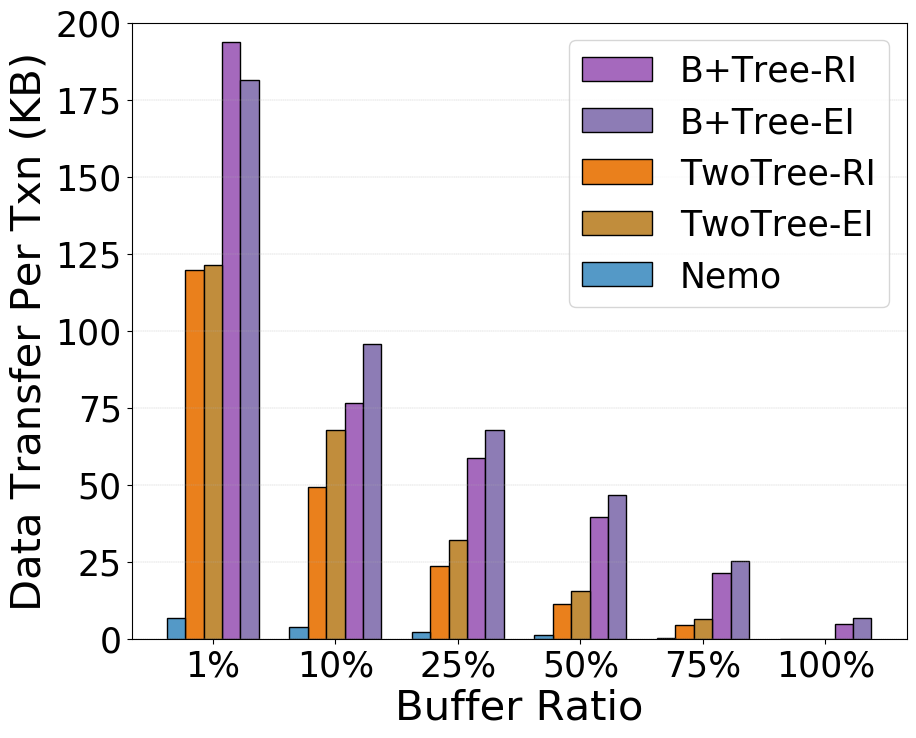

In [ ]:
fig = plt.figure(figsize=(10, 8))


index = np.arange(len(df_tuple["g_total_buf_sz"]))

bar_width = 0.15

ax1 = fig.add_subplot(1, 1, 1)

indices = np.arange(len(df_page))
ax1.bar(indices + offset, 
        df_page["misses_"]*8.0/df_page["txn_cnt_"], bar_width, edgecolor='black',
        color=page_retain_c,
        label=page_idx_label)
ax1.bar(indices + offset * 2, 
        df_page_idx_evict["misses_"]*8.0/df_page_idx_evict["txn_cnt_"], bar_width,edgecolor='black',
        color=page_evict_c,
        label=page_idx_evict_label)

ax1.bar(indices - offset, 
        df_tt["misses_"]*8.0/df_tt["txn_cnt_"], bar_width,edgecolor='black',
        color=tt_retain_c,
        label=tt_idx_label)

ax1.bar(indices, 
        df_tt_idx_evict["misses_"]*8.0/df_tt_idx_evict["txn_cnt_"],bar_width,edgecolor='black',
        color=tt_evict_c,
        label=tt_idx_evict_label)


ax1.bar(indices - offset * 2, 
        df_tuple["misses_"]/df_tuple["txn_cnt_"] , bar_width,edgecolor='black',
        color=bonsai_c,
        label=bonsai_label)

ax1.set_xticks(indices)
x_tick_num = np.round(df_page["g_total_buf_sz"] * 100 / (12 * 1000 * 1000 * 1000), 2).astype(int)
x_tick_labels = [f"{num}%" for num in x_tick_num]

ax1.set_xticklabels(x_tick_labels, fontsize=ticksize)


location = "best"
ax1.legend(loc=location, frameon=True)
ax1.set_ylabel("Data Transfer Per Txn (KB)", fontsize=txtsize)

ax1.set_xlabel("Buffer Ratio", fontsize=txtsize)
# ax1.set_ylim(0, 6)
ax1.set_ylim(0, 200)
ax1.tick_params(axis='y', labelsize=ticksize)
ax1.grid(axis='y', linestyle='--', linewidth=0.25)

ax1.legend(loc="best", fontsize=ticksize)


ax1.grid(axis = 'y', linestyle = '--', linewidth = 0.25)


plt.savefig("/home/hippo/Nemo/figures/ev1-ro-analysis-data-transfer-KB.pdf",bbox_inches='tight')
